<a href="https://colab.research.google.com/github/KjelleJ/enkla-ai-experiment/blob/main/AIX_1_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning / Maskininlärning

---


Du kommer inte att förstå allt här men det viktiga är att du får en uppfattning om hur maskininlärning funkar.

---
**Först en enkel beskrivning: träna en modell som kan skilja på bilder av katter och hundar.**
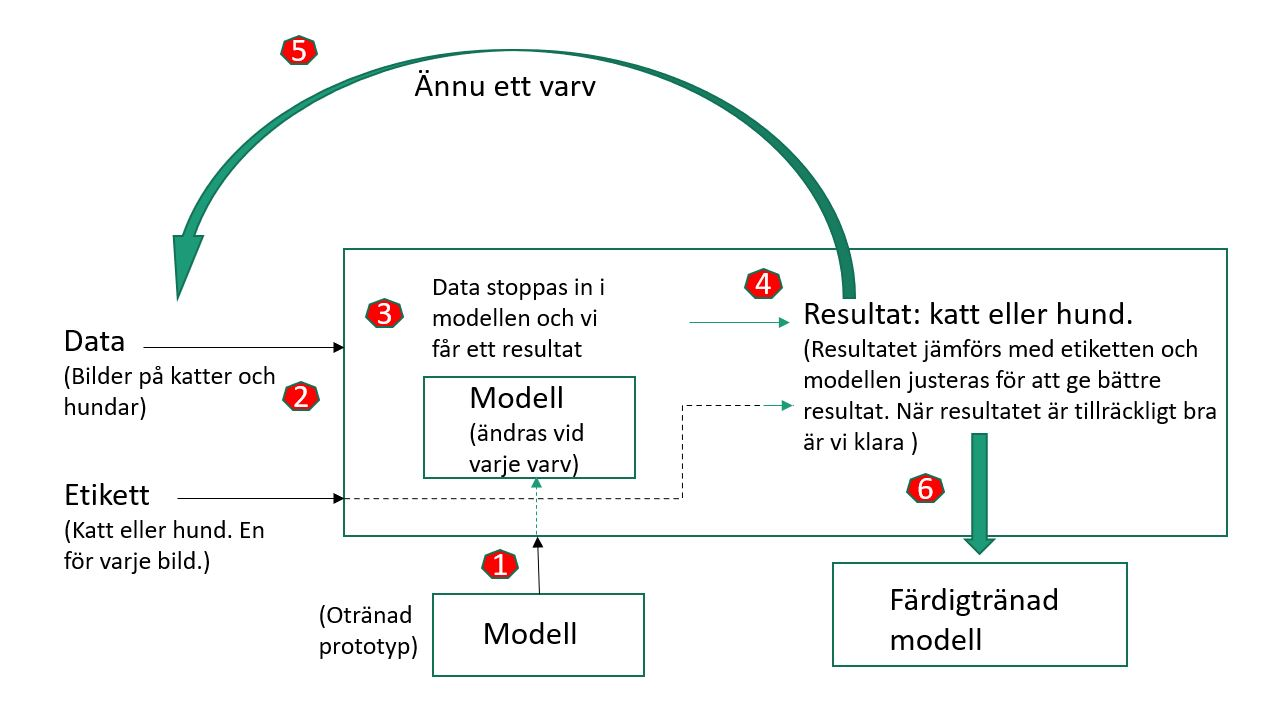

**1)** Först läser programmet in en otränad prototyp av modellen. Prototypmodellen har en viss arkitektur men innehåller bara slumpade värden (kallas vikter). De framslumpade vikterna ska sedan tränas upp så att modellen blir användbar.

**2)** Programmet läser in en bild. Till bilden hör en etikett (label) som talar om vad bilden visar.

**3)** Bilden stoppas in i modellen och vi får ett resultat d.v.s. katt eller hund.

**4)** Resultatet jämförs med etiketten som hör till bilden. Nu justeras vikterna inuti modellen så att resultatet ska bli bättre vid nästa varv.

**5)** Nu är det dags för ett nytt varv i träningen, en ny bild.

**6)** När resultatet är tillräckligt bra eller inte blir bättre avbryter vi träningen och vi har nu en färdigtränad modell. Modellen är en fil med en viss struktur. Modellen kan användas i applikationer av olika slag.

In [ ]:
# TensorFlow version. Denna JNB är framtagen med TensorFlow 2.15.
import tensorflow as tf
tf.__version__

---
# Våra data: Dataset MNIST - handskrivna siffror 0-9.
---



In [ ]:
# Läs in dataset MNIST från Keras
from tensorflow import keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
# träningsdata består av 60,000 bilder med 28x28 pixlar
train_images.shape

In [ ]:
# till varje bild finns en label (0-9) som talar om siffran
len(train_labels)

In [ ]:
# första och sista labels för träning
train_labels

In [ ]:
# plotta de 3 första siffrorna i träningsdata
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.subplot(1, 3, 1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(train_images[1], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(train_images[2], cmap='gray')
plt.show()

In [ ]:
# vi använder testdata (10,000 bilder) för att utvärdera modellen
test_images.shape

In [ ]:
# även för varje testbild finns en label (0-9)
len(test_labels)

In [ ]:
# första och sista labels för test
test_labels

---
# Vår modell: Ett enkelt neuron-nätverk med 2 Fully Connected/Dense-lager
---
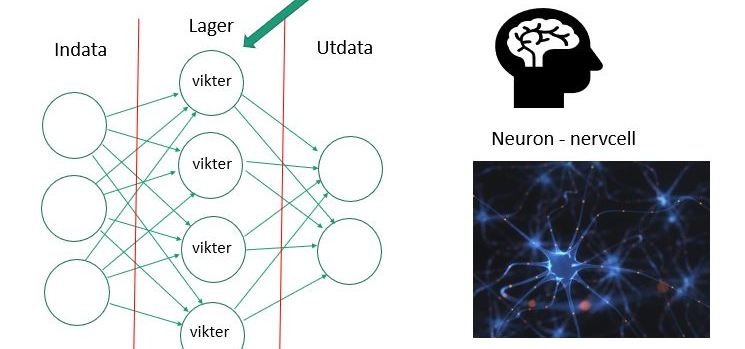

In [ ]:
# definiera modellen
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# definiera optimizer, loss-funktion och metrics
# optimzer och loss styr tillsammans hur modellen uppdateras under träningen.
# metrics visar hur bra modellen är.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# preparera bilderna så att de passar modellen
# platta ut bilderna
train_images = train_images.reshape((60000, 28 * 28))
# normalisera och gör om till flyttal
train_images = train_images.astype("float32") / 255
print(train_images.shape)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
# bygg modellen
model.build(input_shape=(None, 28*28))

In [ ]:
# sammanfattning av modellen - totalt 407,050 vikter i 2 lager
model.summary()

##Testa den otränade modellen

In [ ]:
# mycket dålig noggrannheten för den otränade modellen
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

---
# Träna modellen
---

In [ ]:
# träna modellen i 5 epoker - en epok använder alla tränings-bilder en gång
hist = model.fit(train_images, train_labels, epochs=5, batch_size=128)

# plotta accuracy (finns i variabeln hist) som funktion av epok med hjälp av Gemini

---
# Använd modellen
---

In [ ]:
# använd modellen för de 10 första testbilderna
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
# första testbilden
predictions[0]

In [ ]:
# argmax ger index för största värdet för första testbilden
print(predictions[0].argmax())

In [ ]:
# det största värdet för första testbilden
print(predictions[0][7])

In [ ]:
# label säger att första testbilden är en sjua
print(test_labels[0])

In [ ]:
# test-lables för de 10 första testbilderna
test_labels[0:10]

In [ ]:
# vad modellen säger om de 10 första testbilderna
preds = []
for prediction in predictions: preds.append(prediction.argmax())
preds

---
# Utvärdera modellen på alla testbilder
---

In [ ]:
# mycket bättre nogrannhet med en tränad modell
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

---
## Prova på den här appen
Appen klassificerar handritade siffror. Rita en siffra 0-9 eller något annat och tryck på **Predict**-knappen.

https://gubboit.se/digitapp/